# Global Covid 19 cases 2020 January - July

This is a practice exploratory data analysis (EDA) on the Covid19 data from WHO for the period of January 2020 - July 2020. This data represents the pandemic's beginning and contains the number of confirmed cases, reported deaths, active cases, and recovered cases for each country. To get a more reliable estimate, I will adjust the data for newly reported cases and newly reported deaths.

It is important to note that the data is highly unreliable due to the inconsistency of reporting cases in many countries. The actual amounts are likely far bigger, especially in countries with bad information infrastructure.

Here I check data quality, make adjustments to data structure and visualize and interpret it to my best guess.

Data from WHO, obtained from https://www.kaggle.com/code/meeratif/covid-data-analysis-and-visualize/data

### Importing libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gs
from scipy.stats import normaltest
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

### Importing data

In [89]:
covid19 = pd.read_csv('covid19.csv',sep=',')
covid19 = pd.DataFrame(covid19)

## Visualizing RAW data

The first rows show the beginning of the pandemic in January, where in most countries, there were no reported cases.

In [90]:
covid19.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


The end of the data shows the reported cases in July, where most countries were already affected by the pandemic

In [91]:
covid19.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


## Data Wrangling

In [93]:
# counting NULL values
(covid19['Confirmed'] == 0).value_counts()

False    27138
True      8018
Name: Confirmed, dtype: int64

In [94]:
covid19 = covid19[covid19['Confirmed']!=0]
(covid19['Confirmed'] <= 0).value_counts()

False    27138
Name: Confirmed, dtype: int64

In [95]:
(covid19['New deaths'] < 0).value_counts()

False    27100
True        38
Name: New deaths, dtype: int64

In [96]:
#dropping negative values new_deaths
covid19[covid19['New deaths'] < 0] = 0
covid19 = covid19[covid19['New deaths'] != 0]
(covid19['total_deaths'] < 0).value_counts()

False    10920
Name: total_deaths, dtype: int64

In [97]:
#dropping negative values total_recovered
covid19[covid19['total_recovered'] < 0] = 0
covid19 = covid19[covid19['total_recovered'] != 0]
(covid19['total_recovered'] < 0).value_counts()

False    10437
Name: total_recovered, dtype: int64

### Adding newly calculated columns: total_confirmed, total_deaths, total_recovered

In [92]:
# total confirmed cases
covid19['total_confirmed'] = covid19['Confirmed'] + covid19['New cases']
covid19.tail()

# total deaths
covid19['total_deaths'] = covid19['Deaths'] + covid19['New deaths']
covid19.tail()

# total recovered
covid19['total_recovered'] = covid19['Recovered'] + covid19['New recovered']
covid19.tail()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,total_confirmed,total_deaths,total_recovered
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,10773,80,3752
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,10,1,8
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,1701,487,869
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,4623,141,3280
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa,2896,38,566


#### Dropping unnecessary columns: Confirmed, Deaths, Recovered, New cases, New deaths, New recovered

In [98]:
covid19 = covid19.drop(columns=['Confirmed','Deaths','Recovered','New cases','New deaths','New recovered'])
covid19.tail()

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered
35149,2020-07-27,Venezuela,5883,Americas,16513,150,10172
35151,2020-07-27,West Bank and Gaza,6791,Eastern Mediterranean,10773,80,3752
35153,2020-07-27,Yemen,375,Eastern Mediterranean,1701,487,869
35154,2020-07-27,Zambia,1597,Africa,4623,141,3280
35155,2020-07-27,Zimbabwe,2126,Africa,2896,38,566


### Visualizing the Top 5 countries with the most confirmed cases

The top 5 least confirmed cases are closer to 0 and are not a good visualization in comparison to the top 5 most confirmed cases. I have added them in a table just to show how little it is.

In [477]:
confirmed = covid19.iloc[:,[1,4]].reset_index()
confirmed = confirmed.drop(columns=['index'])

confirmed = confirmed.sort_values(by="total_confirmed",ascending=False) # sort by total confirmed amount
confirmed2 = confirmed.groupby(['Country/Region']).agg('sum').reset_index() # sum confirmed cases for each country
confirmed2.tail()
confirmed2 = confirmed2.sort_values(by="total_confirmed",ascending=False) # sort sum confirmed cases for each country
confirmed.head() #check old df
confirmed2.head() # check new df

,Country/Region,total_confirmed
152,US,228635763
21,Brazil,91966267
124,Russia,46219554
68,India,42357869
156,United Kingdom,26943962


In [478]:
# Top 5 countries with the least confirmed cases
confirmed2.tail()

,Country/Region,total_confirmed
101,Monaco,237
88,Liechtenstein,160
5,Antigua and Barbuda,23
116,Papua New Guinea,22
161,Western Sahara,9


In [479]:
confirmed2['total_confirmed'] = confirmed2['total_confirmed']/1000000 # divide by million for better visualization
confirmed2.head()

,Country/Region,total_confirmed
152,US,228.635763
21,Brazil,91.966267
124,Russia,46.219554
68,India,42.357869
156,United Kingdom,26.943962


## Visualisation top 5 countries with the most confirmed cases

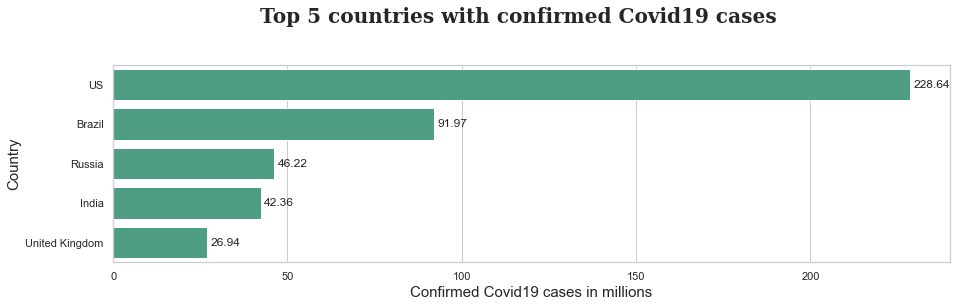

In [481]:
# top 5 countries with the most confirmed cases in the 2020 report
top_5 = confirmed2.head(5)
fig= plt.figure(figsize=(15,8))
g = gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 countries with confirmed Covid19 cases", family='Serif', weight='bold', size=20)
ax1 = plt.subplot(g[0,0])

sns.set_theme(style="whitegrid")
barplot_top_5 = sns.barplot(x='total_confirmed', y='Country/Region', data=top_5, color=color[5])

for p in barplot_top_5.patches:
    width = p.get_width() # bar length
    barplot_top_5.text(width + 1, # 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # Y + X  / 2
            '{:0.2f}'.format(width), 
            ha = 'left', 
            va = 'center')  

ax1.set_xlabel('Confirmed Covid19 cases in millions',fontsize=15)
ax1.set_ylabel('Country',fontsize=15)
plt.show()

The US and Brasil both have the most reported confirmed cases. It is important to note that reported confirmed cases have not been accounted for population size or population density. As third reliability is the variable for how likely the country reported accurately. It is likely that for many countries, cases were often under-reported. Especially in countries where testing to confirm cases is not a standard procedure due to finance, infrastructure, and other variables.

## Group by WHO regions

- All countries were grouped by region. WHO regions were compared in terms of confirmed cases, amount of deaths, and recovered.  - The reported cases were summed to a total for each region. 
- Cases are shown in millions for better visualization.

In [447]:
# Total confirmed cases for each WHO region
confirmed_cases = covid19.groupby('WHO Region').total_confirmed.sum().reset_index()
confirmed_cases = pd.DataFrame(confirmed_cases)
confirmed_cases['total_confirmed'] = confirmed_cases['total_confirmed']/1000000
confirmed_cases.round(2).head(6)

,WHO Region,total_confirmed
0,Africa,18.11
1,Americas,398.47
2,Eastern Mediterranean,71.14
3,Europe,224.74
4,South-East Asia,55.96
5,Western Pacific,13.11


In [448]:
# Total deaths for each WHO region
deaths = covid19.groupby('WHO Region').total_deaths.sum().reset_index()
deaths = pd.DataFrame(deaths)
deaths['total_deaths'] = deaths['total_deaths']/1000000
deaths.round(2).head(6)

,WHO Region,total_deaths
0,Africa,0.37
1,Americas,18.84
2,Eastern Mediterranean,1.90
3,Europe,17.26
4,South-East Asia,1.49
5,Western Pacific,0.46


Again, shown in millions for better visualization.

In [445]:
# Total recovered for each WHO region
recovered = covid19.groupby('WHO Region').total_recovered.sum().reset_index()
recovered = pd.DataFrame(recovered)
recovered['total_recovered'] = recovered['total_recovered']/1000000
recovered.round(2).head()

,WHO Region,total_recovered
0,Africa,9.30
1,Americas,159.71
2,Eastern Mediterranean,46.57
3,Europe,111.65
4,South-East Asia,30.53


## Proportion confirmed cases by WHO region

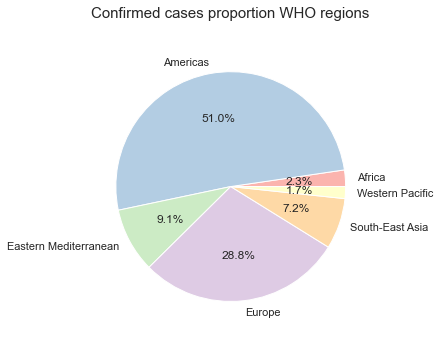

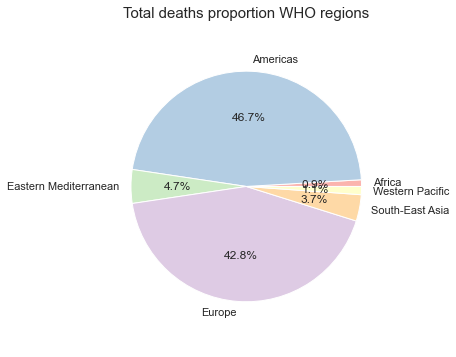

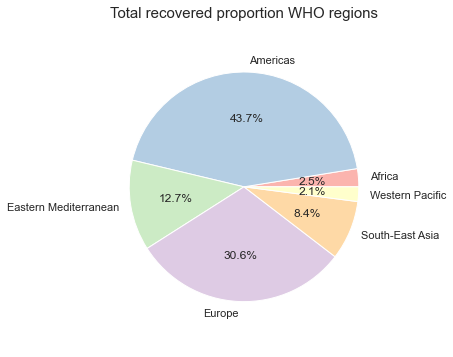

In [500]:
# Proportion confirmed cases
plt.figure(figsize=(10,6))
colors = sns.color_palette("Pastel1")

ax1 = plt.subplot(1,2,1)
who_region = confirmed_cases['WHO Region']
plt.pie(confirmed_cases['total_confirmed'],autopct='%0.1f%%',labels=who_region, colors=colors)
plt.axis('equal')
plt.title('Confirmed cases proportion WHO regions',fontsize=15)
plt.show()

# Proportion deaths
plt.figure(figsize=(10,6))
ax2 = plt.subplot(1,2,2)
plt.pie(deaths['total_deaths'],autopct='%0.1f%%',labels=who_region, colors=colors)
plt.axis('equal')
plt.title('Total deaths proportion WHO regions',fontsize=15)
plt.show()


# Proportion recovered
plt.figure(figsize=(10,6))
ax3 = plt.subplot(1,2,2)
ax3.pie(recovered['total_recovered'],autopct='%0.1f%%',labels=who_region, colors=colors)
ax3.axis('equal')
plt.title('Total recovered proportion WHO regions',fontsize=15)


plt.show()


# Observing data for each region

## Africa

In [106]:
# Africa
africa = covid19.loc[covid19['WHO Region'] == 'Africa']
africa = pd.DataFrame(africa)
africa.tail(5)


,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered
35115,2020-07-27,Senegal,3093,Africa,9847,197,6545
35123,2020-07-27,South Africa,170537,Africa,459625,7365,284773
35125,2020-07-27,South Sudan,1084,Africa,2348,47,1175
35154,2020-07-27,Zambia,1597,Africa,4623,141,3280
35155,2020-07-27,Zimbabwe,2126,Africa,2896,38,566


In [109]:
africa['Date'] = pd.to_datetime(africa['Date'])
# Split date, create column month

africa['month'] = africa['Date'].dt.month
africa.describe().round()

,Active,total_confirmed,total_deaths,total_recovered,month
count,1483.0,1483.0,1483.0,1483.0,1483.0
mean,5532.0,12215.0,253.0,6269.0,6.0
std,19542.0,45085.0,708.0,24705.0,1.0
min,2.0,5.0,2.0,1.0,3.0
25%,359.0,744.0,20.0,200.0,5.0
50%,1304.0,2272.0,52.0,798.0,6.0
75%,3096.0,7262.0,155.0,3371.0,7.0
max,173590.0,459625.0,7365.0,284773.0,7.0


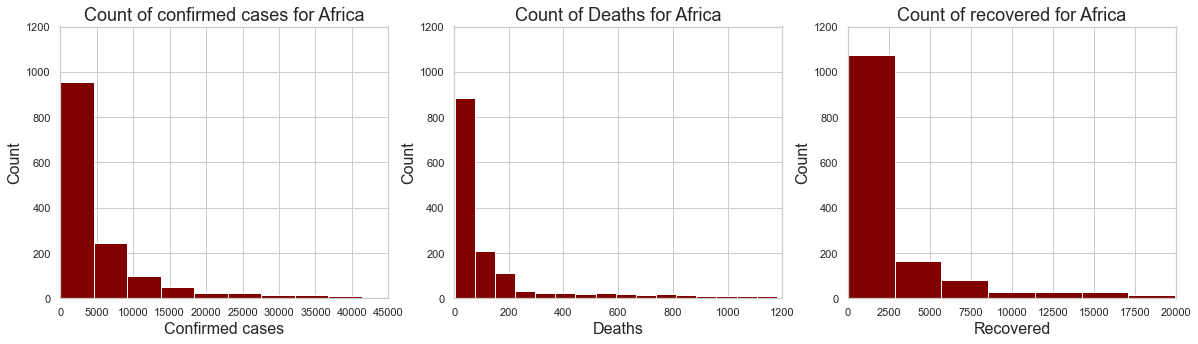

In [425]:
plt.figure(figsize=(20,5))
ax7 = plt.subplot(1,3,1)
ax7.hist(africa['total_confirmed'],bins=100,color='maroon')
ax7.set_xlabel('Confirmed cases',fontsize=16)
ax7.set_ylabel('Count',fontsize=16)
plt.xlim(xmin=0, xmax = 45000)
plt.ylim(ymin=0, ymax = 1200)
ax7.set_title('Count of confirmed cases for Africa',fontsize=18)

ax8 = plt.subplot(1,3,2)
ax8.hist(africa['total_deaths'],bins=100,color='maroon')
ax8.set_xlabel('Deaths',fontsize=16)
ax8.set_ylabel('Count',fontsize=16)
plt.xlim(xmin=0, xmax = 1200)
plt.ylim(ymin=0, ymax = 1200)
ax8.set_title('Count of Deaths for Africa',fontsize=18)

ax9 = plt.subplot(1,3,3)
ax9.hist(africa['total_recovered'],bins=100,color='maroon')
ax9.set_xlabel('Recovered',fontsize=16)
ax9.set_ylabel('Count',fontsize=16)
plt.xlim(xmin=0, xmax = 20000)
plt.ylim(ymin=0, ymax = 1200)
ax9.set_title('Count of recovered for Africa',fontsize=18)

plt.show()

### D'Agostino and Pearson's Test for Africa

In [111]:
# Normality test, no normality expected

stat, p = normaltest(africa['total_confirmed'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
# interpret results
alpha = 0.5
if p >= alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=1898.689, p=0.000
Sample does not look Gaussian (reject H0)


## Americas

In [112]:
# Americas
americas = covid19.loc[covid19['WHO Region'] == 'Americas']
americas = pd.DataFrame(americas)
americas.head(5)

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered
7279,2020-02-29,US,16,Americas,32,2,7
7653,2020-03-02,US,40,Americas,76,11,7
7840,2020-03-03,US,59,Americas,93,8,7
8027,2020-03-04,US,86,Americas,135,15,7
8214,2020-03-05,US,155,Americas,244,13,7


In [113]:
americas['Date'] = pd.to_datetime(americas['Date'])
# Split date, create column month

americas['month'] = americas['Date'].dt.month
americas.tail()

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered,month
35101,2020-07-27,Peru,98752,Americas,403473,18993,277244,7
35129,2020-07-27,Suriname,534,Americas,1527,25,960,7
35142,2020-07-27,US,2816444,Americas,4346595,149087,1353745,7
35147,2020-07-27,Uruguay,216,Americas,1212,36,954,7
35149,2020-07-27,Venezuela,5883,Americas,16513,150,10172,7


In [114]:
americas.describe().round()

,Active,total_confirmed,total_deaths,total_recovered,month
count,1993.0,1993.0,1993.0,1993.0,1993.0
mean,108380.0,199935.0,9451.0,80136.0,5.0
std,351827.0,570821.0,26025.0,227131.0,1.0
min,1.0,9.0,2.0,1.0,2.0
25%,1993.0,2950.0,70.0,487.0,4.0
50%,7831.0,14321.0,435.0,3574.0,5.0
75%,29121.0,70681.0,3092.0,29960.0,6.0
max,2816444.0,4346595.0,149087.0,1880369.0,7.0


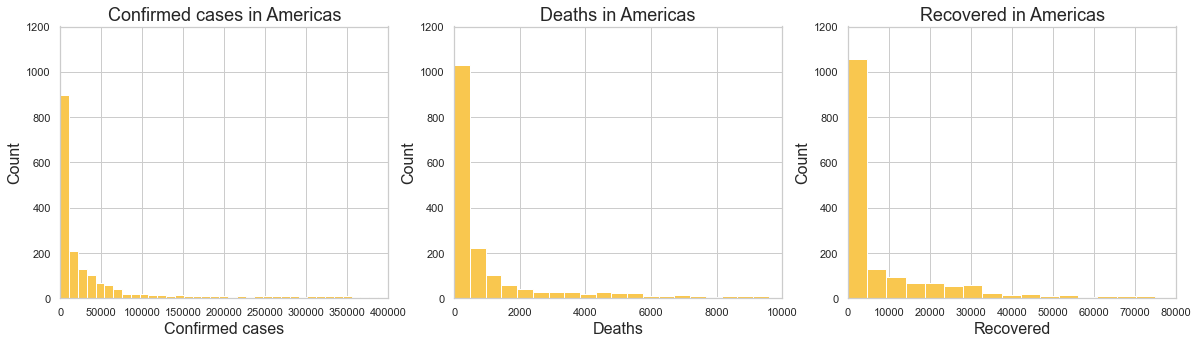

In [426]:
plt.figure(figsize=(20,5))
ax10 = plt.subplot(1,3,1)
ax10.hist(americas['total_confirmed'],bins='auto',color='#f9c74f')
ax10.set_xlabel('Confirmed cases',fontsize=16)
ax10.set_ylabel('Count',fontsize=16)
plt.xlim(xmin=0, xmax = 400000)
plt.ylim(ymin=0, ymax = 1200)
ax10.set_title('Confirmed cases in Americas',fontsize=18)

ax11 = plt.subplot(1,3,2)
ax11.hist(americas['total_deaths'],bins='auto',color='#f9c74f')
ax11.set_xlabel('Deaths',fontsize=16)
ax11.set_ylabel('Count',fontsize=16)
plt.xlim(xmin=0, xmax = 10000)
plt.ylim(ymin=0, ymax = 1200)
ax11.set_title('Deaths in Americas',fontsize=18)


ax12 = plt.subplot(1,3,3)
ax12.hist(americas['total_recovered'],bins='auto',color='#f9c74f')
ax12.set_xlabel('Recovered',fontsize=16)
plt.xlim(xmin=0, xmax = 80000)
plt.ylim(ymin=0, ymax = 1200)
ax12.set_ylabel('Count',fontsize=16)

ax12.set_title('Recovered in Americas',fontsize=18)

plt.show()

### D'Agostino and Pearson's Test for Americas

As epected, the reported confirmed cases do not follow have a gaussian distribution. All cases have a strong right skew as they are correlated.

In [116]:
# Normality test, no normality expected

stat, p = normaltest(americas['total_confirmed'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
# interpret results
alpha = 0.5
if p >= alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=1720.470, p=0.000
Sample does not look Gaussian (reject H0)


## Eastern Mediterranean

In [117]:
# Eastern Mediterranean
mediterranean = covid19.loc[covid19['WHO Region'] == 'Eastern Mediterranean']
mediterranean = pd.DataFrame(mediterranean)
mediterranean.tail(5)

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered
35114,2020-07-27,Saudi Arabia,43238,Eastern Mediterranean,270927,2787,225549
35128,2020-07-27,Sudan,4765,Eastern Mediterranean,11463,723,5988
35145,2020-07-27,United Arab Emirates,6322,Eastern Mediterranean,59441,346,52838
35151,2020-07-27,West Bank and Gaza,6791,Eastern Mediterranean,10773,80,3752
35153,2020-07-27,Yemen,375,Eastern Mediterranean,1701,487,869


In [118]:
mediterranean['Date'] = pd.to_datetime(mediterranean['Date'])
# Split date, create column month

mediterranean['month'] = mediterranean['Date'].dt.month
mediterranean.tail()

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered,month
35114,2020-07-27,Saudi Arabia,43238,Eastern Mediterranean,270927,2787,225549,7
35128,2020-07-27,Sudan,4765,Eastern Mediterranean,11463,723,5988,7
35145,2020-07-27,United Arab Emirates,6322,Eastern Mediterranean,59441,346,52838,7
35151,2020-07-27,West Bank and Gaza,6791,Eastern Mediterranean,10773,80,3752,7
35153,2020-07-27,Yemen,375,Eastern Mediterranean,1701,487,869,7


In [119]:
mediterranean.describe().round()

,Active,total_confirmed,total_deaths,total_recovered,month
count,1680.0,1680.0,1680.0,1680.0,1680.0
mean,13367.0,42347.0,1133.0,27719.0,5.0
std,18339.0,63678.0,2434.0,49571.0,1.0
min,3.0,6.0,2.0,1.0,2.0
25%,1322.0,2253.0,50.0,559.0,4.0
50%,5638.0,14240.0,198.0,4662.0,6.0
75%,18730.0,53380.0,662.0,30692.0,6.0
max,108642.0,296040.0,16124.0,257075.0,7.0


### Visualization of distribution of confirmed cases, deaths and recovered for Eastern Mediterranean.

- As expected most reported confirmed cases were under 50.000. 
- There are peaks above 50.000 that would suggest the pandemic's peak for the period of January to July. 
- The stability of reported cases for larger reported counts indicates that not all countries experienced the pandemic's peak as severely or simultaneously.

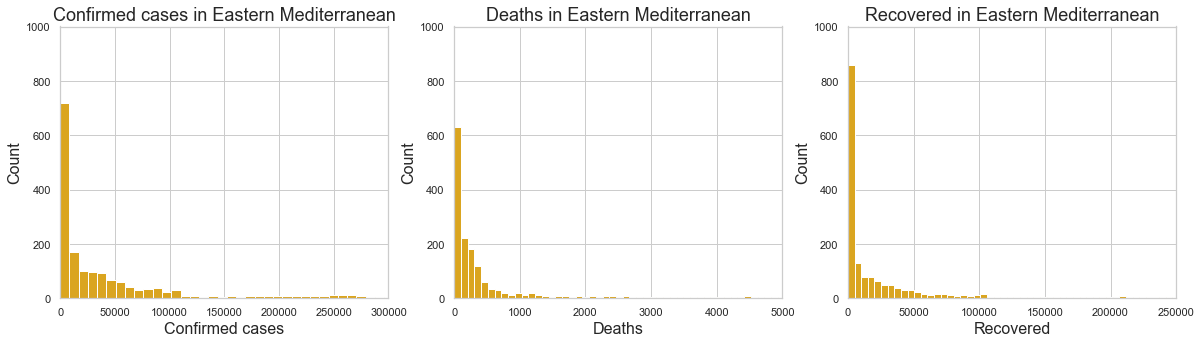

In [429]:
plt.figure(figsize=(20,5))
ax13 = plt.subplot(1,3,1)
ax13.hist(mediterranean['total_confirmed'],bins='auto',color='goldenrod')
ax13.set_xlabel('Confirmed cases',fontsize=16)
ax13.set_ylabel('Count',fontsize=16)
plt.ylim(ymin=0, ymax = 1000)
plt.xlim(xmin=0, xmax = 300000)
ax13.set_title('Confirmed cases in Eastern Mediterranean',fontsize=18)

ax14 = plt.subplot(1,3,2)
ax14.hist(mediterranean['total_deaths'],bins='auto',color='goldenrod')
ax14.set_xlabel('Deaths',fontsize=16)
ax14.set_ylabel('Count',fontsize=16)
plt.xlim(xmin=0, xmax = 5000)
plt.ylim(ymin=0, ymax = 1000)
ax14.set_title('Deaths in Eastern Mediterranean',fontsize=18)


ax15 = plt.subplot(1,3,3)
ax15.hist(mediterranean['total_recovered'],bins='auto',color='goldenrod')
ax15.set_xlabel('Recovered',fontsize=16)
ax15.set_ylabel('Count',fontsize=16)
plt.ylim(ymin=0, ymax = 1000)
plt.xlim(xmin=0, xmax = 250000)
ax15.set_title('Recovered in Eastern Mediterranean',fontsize=18)

plt.show()

### D'Agostino and Pearson's Test for Eastern Mediterranean

As epected, the reported confirmed cases do not follow have a gaussian distribution. All cases have a strong right skew as they are correlated.

In [121]:
# Normality test, no normality expected

stat, p = normaltest(mediterranean['total_confirmed'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
# interpret results
alpha = 0.5
if p >= alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=712.183, p=0.000
Sample does not look Gaussian (reject H0)


## Europe

In [340]:
# Europe
europe = covid19.loc[covid19['WHO Region'] == 'Europe']
europe = pd.DataFrame(europe)
europe.tail(5)

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered
35134,2020-07-27,Tajikistan,1147,Europe,7278,61,6086
35141,2020-07-27,Turkey,10920,Europe,227938,5647,211451
35144,2020-07-27,Ukraine,28258,Europe,67931,1647,37519
35146,2020-07-27,United Kingdom,254427,Europe,302396,45851,1440
35148,2020-07-27,Uzbekistan,9414,Europe,21887,126,12243


In [345]:
europe['Date'] = pd.to_datetime(europe['Date'])
# Split date, create column month

europe['month'] = europe['Date'].dt.month
europe.tail()

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered,month
35134,2020-07-27,Tajikistan,1147,Europe,7278,61,6086,7
35141,2020-07-27,Turkey,10920,Europe,227938,5647,211451,7
35144,2020-07-27,Ukraine,28258,Europe,67931,1647,37519,7
35146,2020-07-27,United Kingdom,254427,Europe,302396,45851,1440,7
35148,2020-07-27,Uzbekistan,9414,Europe,21887,126,12243,7


In [360]:
europe.describe().round()

,Active,total_confirmed,total_deaths,total_recovered,month
count,4164.0,4164.0,4164.0,4164.0,4164.0
mean,22788.0,53971.0,4144.0,26813.0,5.0
std,47219.0,101872.0,9211.0,64272.0,1.0
min,-1.0,13.0,2.0,1.0,2.0
25%,1147.0,2987.0,81.0,492.0,4.0
50%,4934.0,12766.0,329.0,3432.0,5.0
75%,17254.0,44870.0,1748.0,17316.0,6.0
max,254427.0,822287.0,45885.0,605326.0,7.0


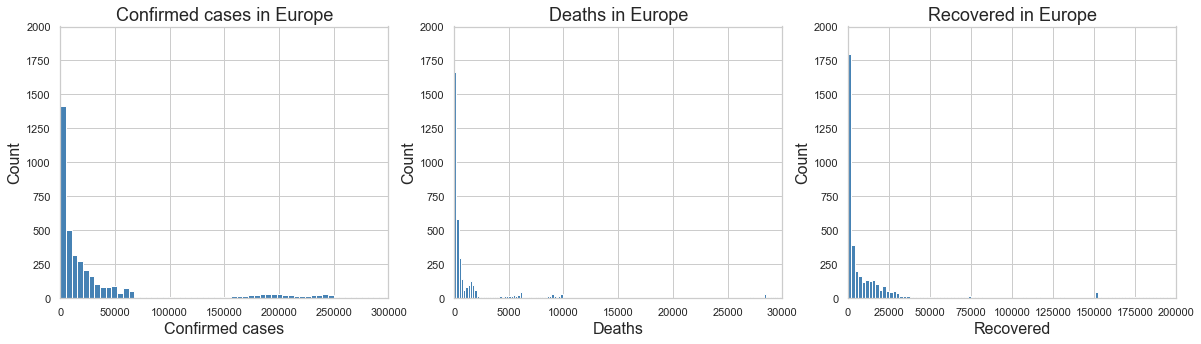

In [382]:
plt.figure(figsize=(20,5))
ax16 = plt.subplot(1,3,1)
ax16.hist(europe['total_confirmed'],bins='auto',color='steelblue')
ax16.set_xlabel('Confirmed cases',fontsize=16)
ax16.set_ylabel('Count',fontsize=16)
plt.xlim(xmin=0, xmax = 300000)
plt.ylim(ymin=0, ymax = 2000)
ax16.set_title('Confirmed cases in Europe',fontsize=18)

ax17 = plt.subplot(1,3,2)
ax17.hist(europe['total_deaths'],bins='auto',color='steelblue')
ax17.set_xlabel('Deaths',fontsize=16)
ax17.set_ylabel('Count',fontsize=16)
# plt.ylim(ymin=0, ymax = 800)
plt.xlim(xmin=0, xmax = 30000)
plt.ylim(ymin=0, ymax = 2000)
ax17.set_title('Deaths in Europe',fontsize=18)


ax18 = plt.subplot(1,3,3)
ax18.hist(europe['total_recovered'],bins='auto',color='steelblue')
ax18.set_xlabel('Recovered',fontsize=16)
ax18.set_ylabel('Count',fontsize=16)
plt.ylim(ymin=0, ymax = 2000)
plt.xlim(xmin=0, xmax = 200000)
ax18.set_title('Recovered in Europe',fontsize=18)

plt.show()

### D'Agostino and Pearson's Test for Europe

As epected, the reported confirmed cases do not follow have a gaussian distribution. All cases have a strong right skew as they are correlated.

In [126]:
# Normality test, no normality expected

stat, p = normaltest(europe['total_confirmed'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
# interpret results
alpha = 0.5
if p >= alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=3149.872, p=0.000
Sample does not look Gaussian (reject H0)


## South-East Asia

In [305]:
# South-East Asia
se_asia = covid19.loc[covid19['WHO Region'] == 'South-East Asia']
se_asia = pd.DataFrame(se_asia)
se_asia.tail(5)

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered
34862,2020-07-26,Indonesia,37342,South-East Asia,100270,4848,57956
34982,2020-07-27,Bangladesh,97577,South-East Asia,228997,3002,127484
35048,2020-07-27,India,495499,South-East Asia,1524530,34045,984764
35049,2020-07-27,Indonesia,37292,South-East Asia,101828,4895,59691
35088,2020-07-27,Nepal,4950,South-East Asia,18891,51,14380


In [306]:
se_asia['Date'] = pd.to_datetime(se_asia['Date'])
# Split date, create column month

se_asia['month'] = se_asia['Date'].dt.month
se_asia.tail()

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered,month
34862,2020-07-26,Indonesia,37342,South-East Asia,100270,4848,57956,7
34982,2020-07-27,Bangladesh,97577,South-East Asia,228997,3002,127484,7
35048,2020-07-27,India,495499,South-East Asia,1524530,34045,984764,7
35049,2020-07-27,Indonesia,37292,South-East Asia,101828,4895,59691,7
35088,2020-07-27,Nepal,4950,South-East Asia,18891,51,14380,7


In [358]:
se_asia.describe().round()

,Active,total_confirmed,total_deaths,total_recovered,month
count,486.0,486.0,486.0,486.0,486.0
mean,47950.0,115147.0,3068.0,62826.0,5.0
std,84595.0,247933.0,6284.0,155847.0,1.0
min,10.0,18.0,2.0,2.0,3.0
25%,1680.0,2874.0,45.0,512.0,4.0
50%,14119.0,19486.0,764.0,5431.0,5.0
75%,53418.0,93106.0,2562.0,42022.0,6.0
max,495499.0,1524530.0,34045.0,984764.0,7.0


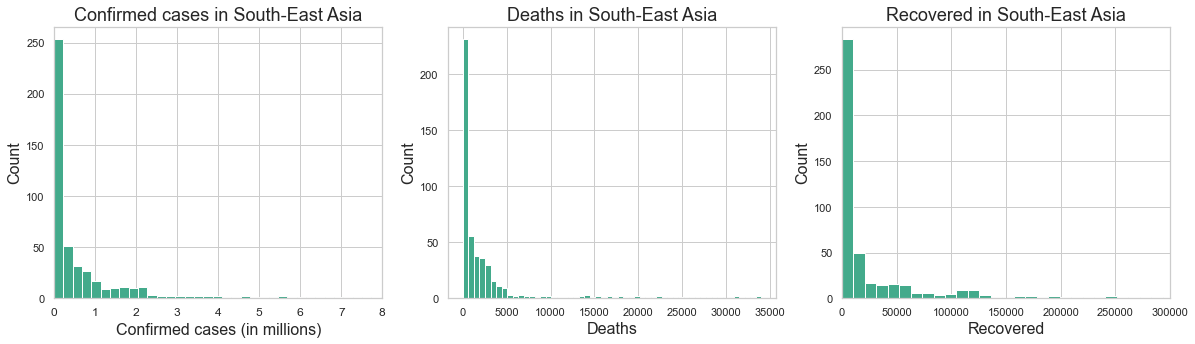

In [359]:
plt.figure(figsize=(20,5))
ax19 = plt.subplot(1,3,1)
ax19.hist(se_asia['total_confirmed'],bins='auto',color='#43aa8b')
plt.xlim(xmin=0, xmax = 800000)
ax19.set_xlabel('Confirmed cases (in millions)',fontsize=16)
ax19.set_xticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12)
ax19.set_ylabel('Count',fontsize=16)
ax19.set_title('Confirmed cases in South-East Asia',fontsize=18)

ax20 = plt.subplot(1,3,2)
ax20.hist(se_asia['total_deaths'],bins='auto',color='#43aa8b')
ax20.set_xlabel('Deaths',fontsize=16)
# plt.xlim(xmin=0, xmax = 40000)
# ax20.set_xticklabels(['0','5','10','15','20','25','30','35'],fontsize=12)
ax20.set_ylabel('Count',fontsize=16)
ax20.set_title('Deaths in South-East Asia',fontsize=18)


ax21 = plt.subplot(1,3,3)
ax21.hist(se_asia['total_recovered'],bins='auto',color='#43aa8b')
# ax21.xaxis.set_ticks(np.arange(0, 400000, 100000))
plt.xlim(xmin=0, xmax = 300000)
ax21.set_xlabel('Recovered',fontsize=16)
# ax21.set_xticklabels(['0','50','75','100','125','150','200','250','300'],fontsize=12)
ax21.set_ylabel('Count',fontsize=16)
ax21.set_title('Recovered in South-East Asia',fontsize=18)

plt.show()

### D'Agostino and Pearson's Test for South-East Asia

As epected, the reported confirmed cases do not follow have a gaussian distribution. All cases have a strong right skew as they are correlated.

In [431]:
# Normality test, no normality expected

stat, p = normaltest(se_asia['total_confirmed'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
# interpret results
alpha = 0.5
if p >= alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=371.327, p=0.000
Sample does not look Gaussian (reject H0)


## Western Pacific

In [144]:
# Western Pacific
western_pacific = covid19.loc[covid19['WHO Region'] == 'Western Pacific']
western_pacific = pd.DataFrame(western_pacific)
western_pacific.tail(5)

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered
34937,2020-07-26,South Korea,971,Western Pacific,14200,300,12920
34977,2020-07-27,Australia,5825,Western Pacific,15671,173,9448
35005,2020-07-27,China,3258,Western Pacific,86996,4660,78876
35102,2020-07-27,Philippines,53649,Western Pacific,83632,1958,26782
35124,2020-07-27,South Korea,896,Western Pacific,14231,301,13109


In [145]:
western_pacific['Date'] = pd.to_datetime(western_pacific['Date'])
# Split date, create column month

western_pacific['month'] = western_pacific['Date'].dt.month
western_pacific.tail()

,Date,Country/Region,Active,WHO Region,total_confirmed,total_deaths,total_recovered,month
34937,2020-07-26,South Korea,971,Western Pacific,14200,300,12920,7
34977,2020-07-27,Australia,5825,Western Pacific,15671,173,9448,7
35005,2020-07-27,China,3258,Western Pacific,86996,4660,78876,7
35102,2020-07-27,Philippines,53649,Western Pacific,83632,1958,26782,7
35124,2020-07-27,South Korea,896,Western Pacific,14231,301,13109,7


In [146]:
western_pacific.describe().round()

,Active,total_confirmed,total_deaths,total_recovered,month
count,631.0,631.0,631.0,631.0,631.0
mean,8031.0,20777.0,731.0,11907.0,4.0
std,11932.0,25589.0,1075.0,19800.0,2.0
min,0.0,22.0,2.0,2.0,1.0
25%,1151.0,5306.0,68.0,702.0,3.0
50%,3359.0,10748.0,245.0,4837.0,4.0
75%,8672.0,20145.0,938.0,11848.0,6.0
max,58739.0,86996.0,5926.0,78881.0,7.0


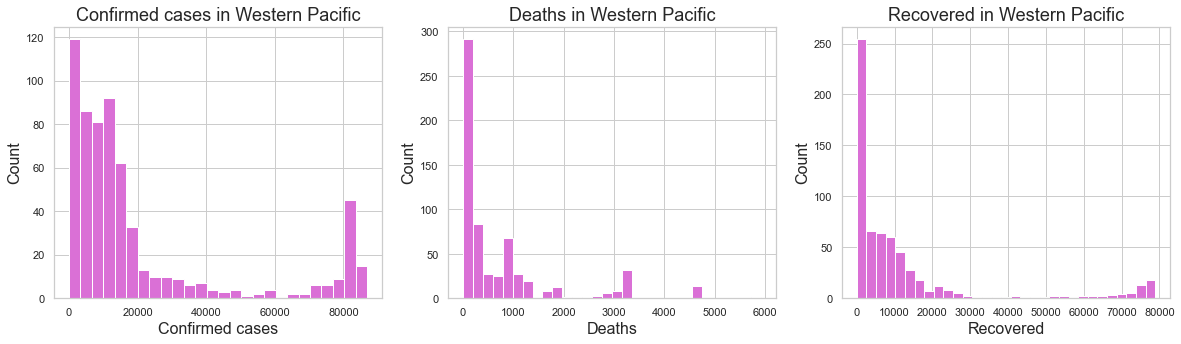

In [336]:
plt.figure(figsize=(20,5))
ax22 = plt.subplot(1,3,1)
ax22.hist(western_pacific['total_confirmed'],bins='auto',color='orchid')
ax22.set_xlabel('Confirmed cases',fontsize=16)
ax22.set_ylabel('Count',fontsize=16)
ax22.set_title('Confirmed cases in Western Pacific',fontsize=18)

ax23 = plt.subplot(1,3,2)
ax23.hist(western_pacific['total_deaths'],bins='auto',color='orchid')
ax23.set_xlabel('Deaths',fontsize=16)
ax23.set_ylabel('Count',fontsize=16)
ax23.set_title('Deaths in Western Pacific',fontsize=18)


ax24 = plt.subplot(1,3,3)
ax24.hist(western_pacific['total_recovered'],bins='auto',color='orchid')
ax24.set_xlabel('Recovered',fontsize=16)
ax24.set_ylabel('Count',fontsize=16)
ax24.set_title('Recovered in Western Pacific',fontsize=18)

plt.show()

### D'Agostino and Pearson's Test for Western Pacific

- As expected, the reported confirmed cases do not have a Gaussian distribution, and all cases have a strong right skew (as they are correlated). 
- However, in comparison to the other WHO regions, the Western Pacific countries seem to be the most affected by a peak in the pandemic at the same time. 
- Interestingly, their confirmed cases are far less than in the Americas or Europe. 
- It is also important to note that many countries might have under-reported their cases more than the Americas or Europe due to a lack of information infrastructure, as often with developing countries.

In [705]:
# Normality test, no normality expected

stat, p = normaltest(western_pacific['total_confirmed'])
print('Statistics=%.3f, p=%.3f' % (stat,p))
# interpret results
alpha = 0.5
if p >= alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=130.217, p=0.000
Sample does not look Gaussian (reject H0)


## Comparing confirmed cases per month per WHO region

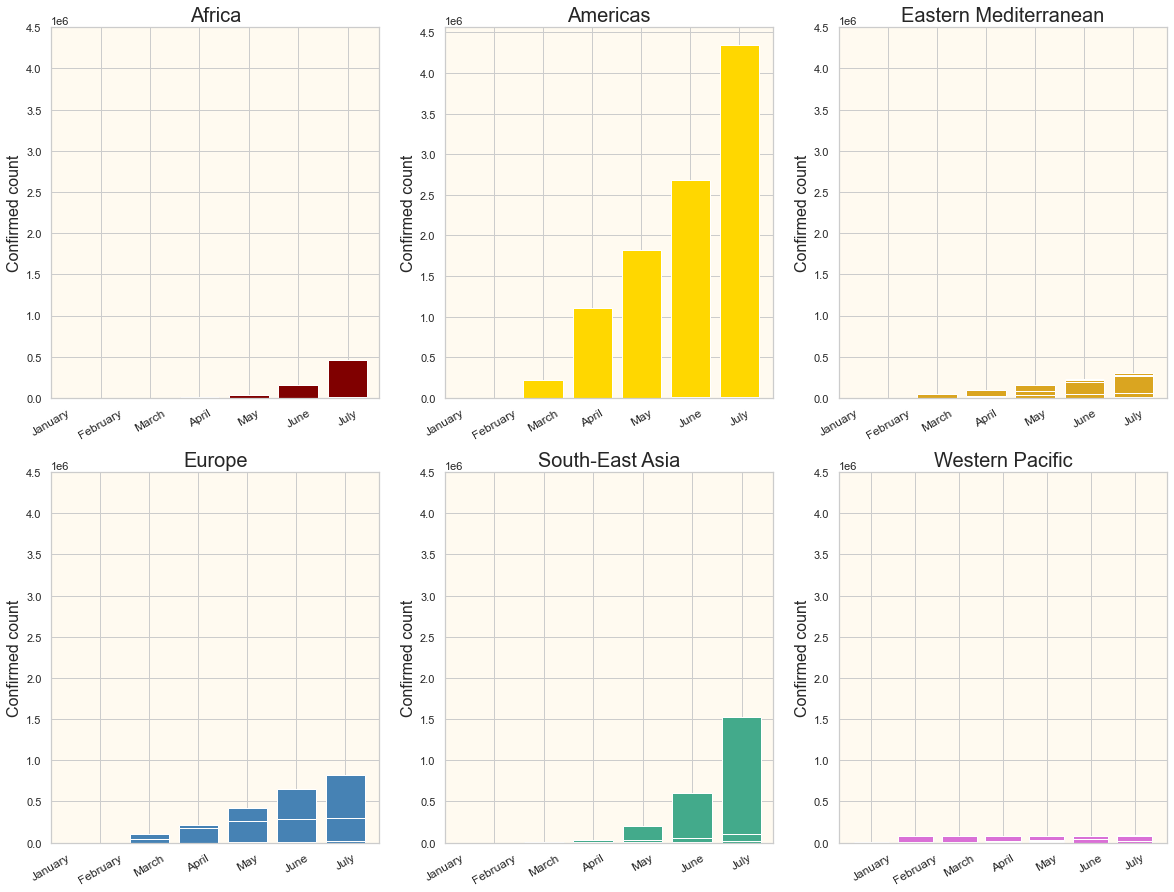

In [508]:
plt.figure(figsize=(20,15))
months = [1,2,3,4,5,6,7]
labels = ['January', 'February', 'March','April','May','June','July']
#-------------------------------------------------------------------------------------------------------------------------- 

# First Subplot Africa

ax1 = plt.subplot(2, 3, 1)
plt.bar(africa['month'], africa['total_confirmed'], color='maroon')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Confirmed count',fontsize=16)
start, end = ax1.get_xlim()
ax1.yaxis.set_ticks(np.arange(0, 5000000, 500000))
ax1.xaxis.set_ticks(np.arange(1, 8, 1))
ax1.set_xticklabels(labels, rotation='30',fontsize=12)
ax1.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Africa',fontsize=20)

#-------------------------------------------------------------------------------------------------------------------------- 

# Second Subplot Americas
ax2 = plt.subplot(2, 3, 2)
plt.bar(americas['month'], americas['total_confirmed'], color='gold')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Confirmed count',fontsize=16)
start, end = ax2.get_xlim()
ax2.yaxis.set_ticks(np.arange(0, 5000000, 500000))
ax2.xaxis.set_ticks(np.arange(1, 8, 1))
ax2.set_xticklabels(labels, rotation='30',fontsize=12)
ax2.set_facecolor("floralwhite")# Setting the background color of the plot 
plt.title('Americas',fontsize=20)

#-------------------------------------------------------------------------------------------------------------------------- 

# Third Subplot Eastern Mediterranean
ax3 = plt.subplot(2, 3, 3)
plt.bar(mediterranean['month'], mediterranean['total_confirmed'], color='goldenrod')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Confirmed count',fontsize=16)
start, end = ax3.get_xlim()
ax3.yaxis.set_ticks(np.arange(0, 5000000, 500000))
ax3.set_xticklabels(labels, rotation='30',fontsize=12)
ax3.xaxis.set_ticks(np.arange(1, 8, 1))
ax3.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Eastern Mediterranean',fontsize=20)

#-------------------------------------------------------------------------------------------------------------------------- 

# Fourth Subplot Europe
ax4 = plt.subplot(2, 3, 4)
plt.bar(europe['month'], europe['total_confirmed'], color='steelblue')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Confirmed count',fontsize=16)
start, end = ax4.get_xlim()
ax4.yaxis.set_ticks(np.arange(0, 5000000, 500000))
ax4.xaxis.set_ticks(np.arange(1, 8, 1))
ax4.set_xticklabels(labels, rotation='30',fontsize=12)
ax4.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Europe',fontsize=20)

#-------------------------------------------------------------------------------------------------------------------------- 

# Fifth subplot South-East Asia
ax5 = plt.subplot(2, 3, 5)
plt.bar(se_asia['month'], se_asia['total_confirmed'], color='#43aa8b')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Confirmed count',fontsize=16)
start, end = ax5.get_xlim()
ax5.yaxis.set_ticks(np.arange(0, 5000000, 500000))
ax5.xaxis.set_ticks(np.arange(1, 8, 1))
ax5.set_xticklabels(labels, rotation='30',fontsize=12)
ax5.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('South-East Asia',fontsize=20)
 
#--------------------------------------------------------------------------------------------------------------------------    

# Sixth subplot Western Pacific
ax6 = plt.subplot(2, 3, 6)
total_confirmed_wp = western_pacific['total_confirmed']
months = western_pacific['month']
plt.bar(months, total_confirmed_wp, color='orchid') #deaths
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Confirmed count',fontsize=16)

start, end = ax6.get_xlim()
ax6.yaxis.set_ticks(np.arange(0, 5000000, 500000))
ax6.xaxis.set_ticks(np.arange(1, 8, 1))
ax6.set_xticklabels(labels, rotation='30',fontsize=12)
ax6.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Western Pacific',fontsize=20)  


# Display subplots
plt.show()

## Comparing deaths per month per WHO region

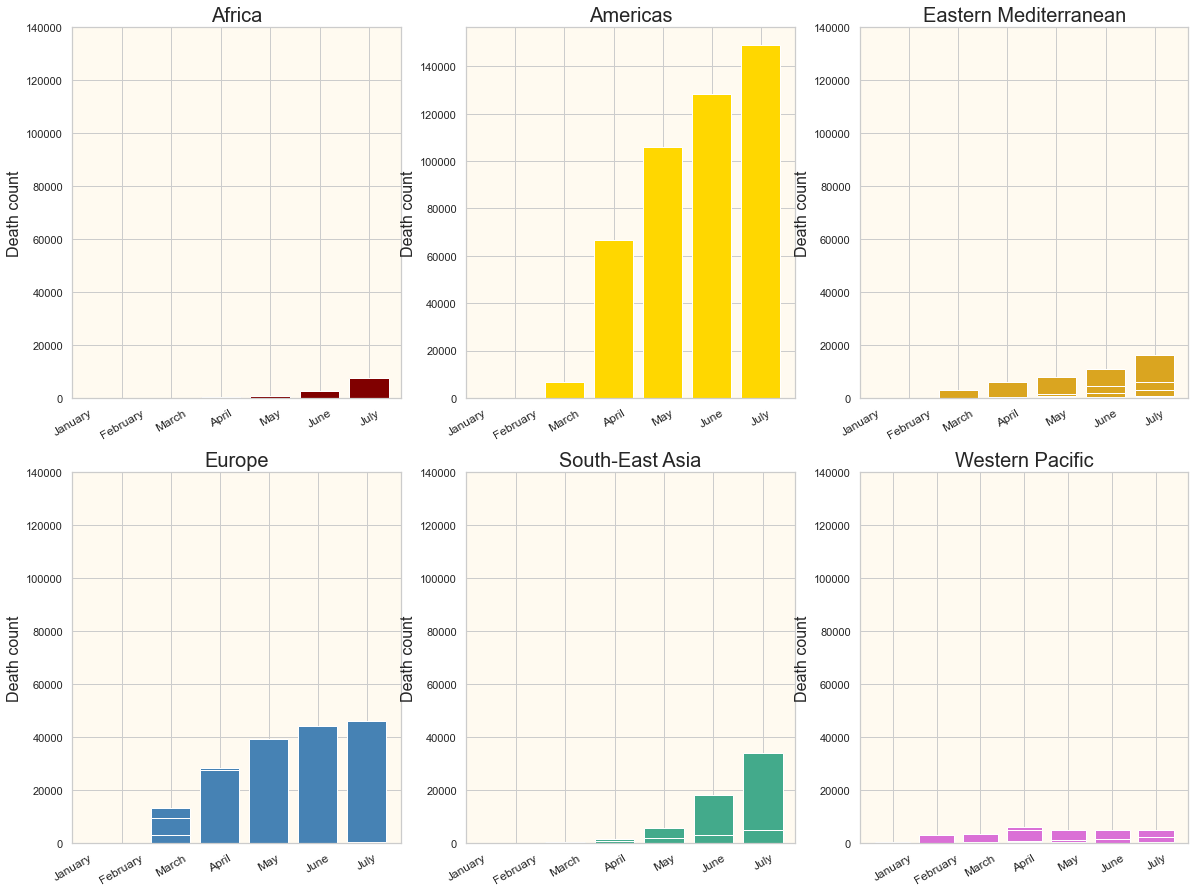

In [507]:
plt.figure(figsize=(20,15))

#-------------------------------------------------------------------------------------------------------------------------- 

# First Subplot Africa

ax1 = plt.subplot(2, 3, 1)
plt.bar(africa['month'], africa['total_deaths'], color='maroon')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Death count',fontsize=16)
start, end = ax1.get_xlim()
ax1.yaxis.set_ticks(np.arange(0, 160000, 20000))
ax1.xaxis.set_ticks(np.arange(1, 8, 1))
ax1.set_xticklabels(labels, rotation='30',fontsize=12)
ax1.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Africa',fontsize=20)

#-------------------------------------------------------------------------------------------------------------------------- 

# Second Subplot Americas
ax2 = plt.subplot(2, 3, 2)
plt.bar(americas['month'], americas['total_deaths'], color='gold')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Death count',fontsize=16)
start, end = ax2.get_xlim()
ax2.yaxis.set_ticks(np.arange(0, 160000, 20000))
ax2.xaxis.set_ticks(np.arange(1, 8, 1))
ax2.set_xticklabels(labels, rotation='30',fontsize=12)
ax2.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Americas',fontsize=20)

#-------------------------------------------------------------------------------------------------------------------------- 

# Third Subplot Eastern Mediterranean
ax3 = plt.subplot(2, 3, 3)
plt.bar(mediterranean['month'], mediterranean['total_deaths'], color='goldenrod')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Death count',fontsize=16)
start, end = ax3.get_xlim()
ax3.yaxis.set_ticks(np.arange(0, 160000, 20000))
ax3.xaxis.set_ticks(np.arange(1, 8, 1))
ax3.set_xticklabels(labels, rotation='30',fontsize=12)
ax3.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Eastern Mediterranean',fontsize=20)

#-------------------------------------------------------------------------------------------------------------------------- 

# Fourth Subplot Europe
ax4 = plt.subplot(2, 3, 4)
plt.bar(europe['month'], europe['total_deaths'], color='steelblue')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Death count',fontsize=16)
start, end = ax4.get_xlim()
ax4.yaxis.set_ticks(np.arange(0, 160000, 20000))
ax4.xaxis.set_ticks(np.arange(1, 8, 1))
ax4.set_xticklabels(labels, rotation='30',fontsize=12)
ax4.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Europe',fontsize=20)

#-------------------------------------------------------------------------------------------------------------------------- 

# Fifth subplot South-East Asia
ax5 = plt.subplot(2, 3, 5)
plt.bar(se_asia['month'], se_asia['total_deaths'], color='#43aa8b')
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Death count',fontsize=16)
start, end = ax5.get_xlim()
ax5.yaxis.set_ticks(np.arange(0, 160000, 20000))
ax5.xaxis.set_ticks(np.arange(1, 8, 1))
ax5.set_xticklabels(labels, rotation='30',fontsize=12)
ax5.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('South-East Asia',fontsize=20)
 
#--------------------------------------------------------------------------------------------------------------------------    

# Sixth subplot Western Pacific
ax6 = plt.subplot(2, 3, 6)
total_confirmed_wp = western_pacific['total_confirmed']
total_deaths_wp = western_pacific['total_deaths']
total_recovered_wp = western_pacific['total_recovered']
months = western_pacific['month']
plt.bar(months, total_deaths_wp, color='orchid') #deaths
# plt.xlabel('Months',fontsize=16)
plt.ylabel('Death count',fontsize=16)

start, end = ax6.get_xlim()
ax6.yaxis.set_ticks(np.arange(0, 160000, 20000))
ax6.xaxis.set_ticks(np.arange(1, 8, 1))
ax6.set_xticklabels(labels, rotation='30',fontsize=12)
ax6.set_facecolor("floralwhite")# Setting the background color of the plot
plt.title('Western Pacific',fontsize=20)  

# Display subplots
plt.show()

# Final Conclusions

### WHO Regions

From the visualization and summary statistics, it can be concluded that there was an increase in Covid19 cases for each month for all WHO regions. 
1. The most affected WHO region was the Americas, with the US followed by Brazil as the most affected country. 
2. The WHO region with the least confirmed cases was the Western Pacific (Interestingly, China, where Covid19 started, is part of the Western Pacific region.)
3. The least amount of observed deaths were in Africa. However, this might be an unreliable conclusion, as Africa had fewer means of testing and validating confirmed cases. It is most likely that the actual amount is far bigger.

From simply visualizing the data, many conclusions can be made. However, knowing the data's origin and the specifics brings the results into another light. It might be that the regions Africa, South-East Asia, and Western Pacific were not, as the data suggests, less affected by the pandemic but instead had fewer resources to test and record positive cases. And equally for the number of deaths.